<a href="https://colab.research.google.com/github/GuillermoCalderon23/ProgramacionAD/blob/main/Copia_de_PDA_MODEL_PREDICTIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
# Importar librerias/Modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
sns.set_style('whitegrid',{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import r2_score

In [170]:
# Definimos la ruta donde se encuentra nuestro archivo CSV
BikeData='/content/SeoulBikeData.csv'

# Utilizamos la función "read_csv" de pandas para leer nuestro archivo CSV, y especificamos el encoding, 
# El encoding se refiere a la codificación de caracteres utilizada en el archivo CSV. En este caso, se utilizó el encoding 'ISO-8859-1' para asegurarse de que los caracteres en el archivo CSV se lean correctamente..
# Luego, almacenamos el resultado en el DataFrame "df"
#df = pd.read_csv(BikeData, encoding='ISO-8859-1')
df = pd.read_csv(BikeData, sep=',', encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [159]:
#Historia de los datos

In [171]:
# Contenido (Registros, Columns)
df.shape

(8760, 14)

In [172]:
#Información de la tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [173]:
# Convertir tipos de datos a los que sean idoneos para nuestro proposito, a traves de "to_datetime" para fechas y "astype" para objet, int o float
df['Date']=pd.to_datetime(df['Date'])
print(df.dtypes)

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object


<ipython-input-173-d524343be42c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [174]:
# Contabilizar los ceros
zeros_count = df.eq(0).sum()
print(zeros_count)

Date                            0
Rented Bike Count             295
Hour                          365
Temperature(°C)                21
Humidity(%)                    17
Wind speed (m/s)               74
Visibility (10m)                0
Dew point temperature(°C)      60
Solar Radiation (MJ/m2)      4300
Rainfall(mm)                 8232
Snowfall (cm)                8317
Seasons                         0
Holiday                         0
Functioning Day                 0
dtype: int64


In [175]:
# Duplicidad... Como en teroria no existen mas de 1 Hora al dia crearemos una "PK_Natural" con fecha + hora y la llamaremos "PK_Natural"
# Creamos la columna PK_Natural
df['PK_Natural'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Hour'].astype(str)

# Verificamos si hay filas duplicadas
duplicados = df.duplicated()
print('Q de filas duplicadas:', duplicados.sum())

Q de filas duplicadas: 0


In [176]:
# Q por columna
for i in df.columns:
  print('\n ')
  print('Columna:', i)
  print(df[i].value_counts())


 
Columna: Date
2017-01-12    24
2018-09-08    24
2018-07-08    24
2018-06-08    24
2018-05-08    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64

 
Columna: Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

 
Columna: Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
Columna: Temperature(°C)
 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64

 
Columna: Humidity(%)
53    173
97    173
43    164

In [177]:
# Sacamos el dia de la semana, mes y año
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].map(lambda x: x.year).astype('object')
# Eliminar la columna fecha
df.drop(columns=['Date'],inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,PK_Natural,day_of_week,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 0,Thursday,January,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 1,Thursday,January,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 2,Thursday,January,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 3,Thursday,January,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 4,Thursday,January,2017


In [178]:
df[df['month'] == 'January'].describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,386.080645,11.500000,2.722849,52.931452,1.813038,1392.811828,-6.599059,0.355175,0.121371,0.250269
std,465.406497,6.926843,12.537172,19.763389,1.137459,647.902583,14.208938,0.640648,0.990772,0.633986
min,9.000000,0.000000,-17.800000,17.000000,0.000000,81.000000,-30.600000,0.000000,0.000000,0.000000
25%,113.750000,5.750000,-5.925000,36.000000,0.900000,788.500000,-17.725000,0.000000,0.000000,0.000000
50%,215.500000,11.500000,0.550000,51.000000,1.600000,1742.000000,-7.250000,0.000000,0.000000,0.000000
75%,391.500000,17.250000,7.725000,67.000000,2.500000,1996.000000,0.525000,0.520000,0.000000,0.000000
max,3088.000000,23.000000,39.400000,97.000000,6.000000,2000.000000,26.100000,3.300000,18.500000,3.500000


In [44]:
# Analizaremos los datos numericos y los categoricos:
Datos_numericos= df.select_dtypes(exclude='object')
Datos_Categoricos=df.select_dtypes(include='object')

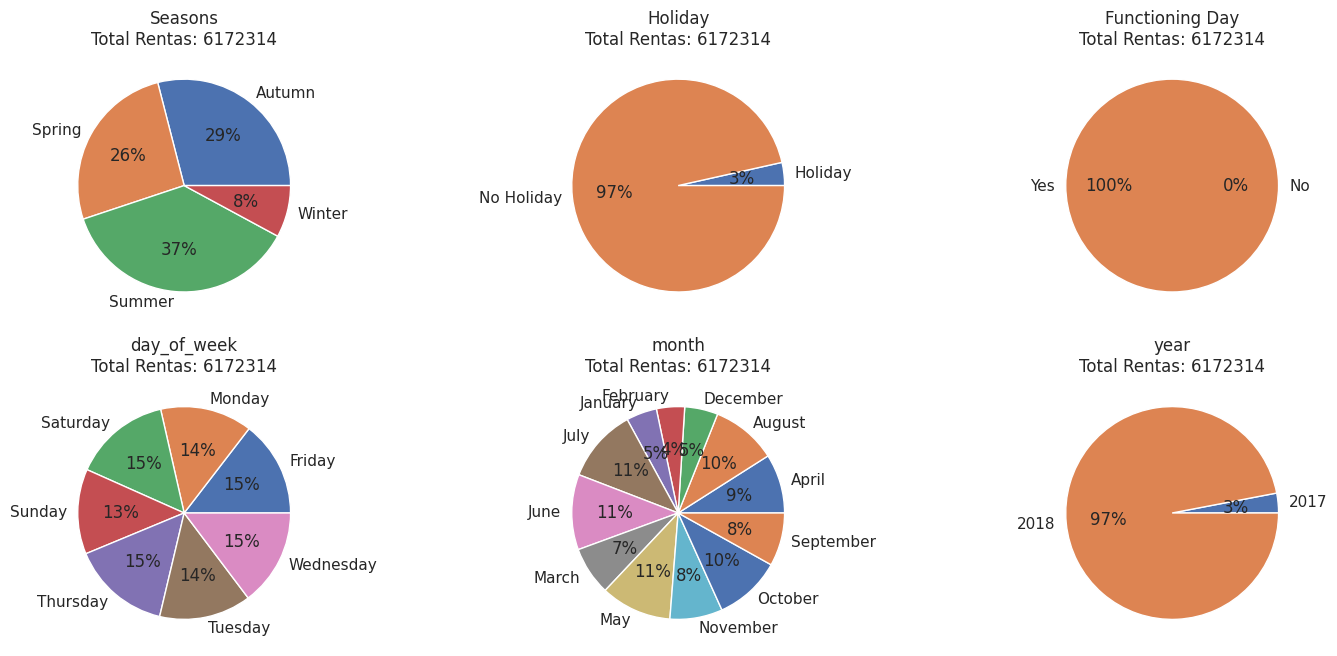

In [ ]:
n = 1
plt.figure(figsize=(15, 10))
# Lista para almacenar las sumas de Rented Bike Count
bike_count_sum = []  

for i in Datos_Categoricos.columns:
    plt.subplot(3, 3, n)
    n = n + 1
    bike_counts = df.groupby(i)['Rented Bike Count'].sum()
    # Agregar la suma total a la lista
    bike_count_sum.append(bike_counts.sum())  
    plt.pie(bike_counts, labels=bike_counts.keys().tolist(), autopct='%.0f%%')
    # Actualizar el título
    plt.title(f'{i}\nTotal Rentas: {bike_counts.sum()}')  
    plt.tight_layout()

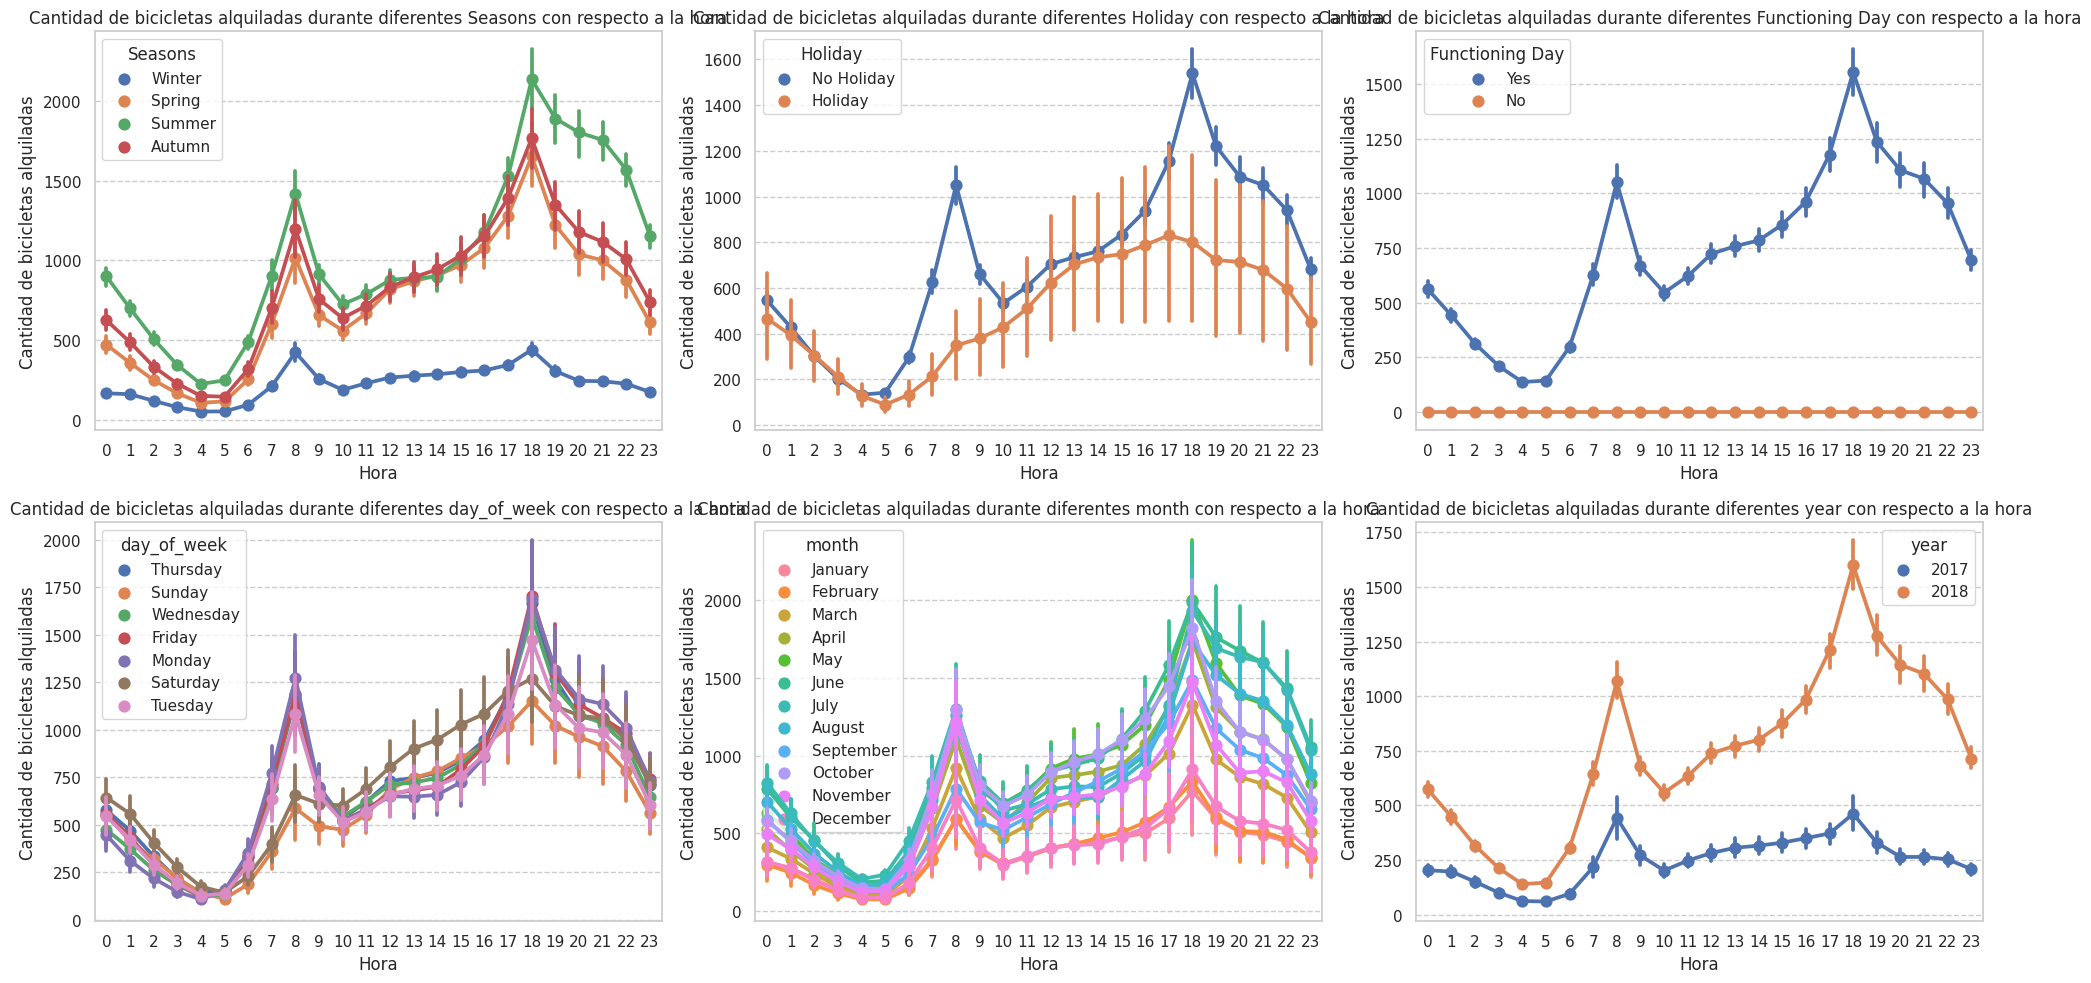

In [ ]:
# Gráficos de puntos con la columna "Rented Bike Count" durante diferentes características categóricas con respecto a la "Hora"
fig, axes = plt.subplots(2, 3, figsize=(20,10))

for i, ax in zip(Datos_Categoricos.columns, axes.flatten()):
    if i == 'Hour':
        continue
    sns.pointplot(x=df['Hour'], y=df['Rented Bike Count'], hue=df[i], ax=ax)
    ax.set_title(f'Cantidad de bicicletas alquiladas durante diferentes {i} con respecto a la hora')
    ax.set_xlabel('Hora')
    ax.set_ylabel('Cantidad de bicicletas alquiladas')
    
plt.tight_layout()
plt.show()



====================================================================== Seasons ======================================================================




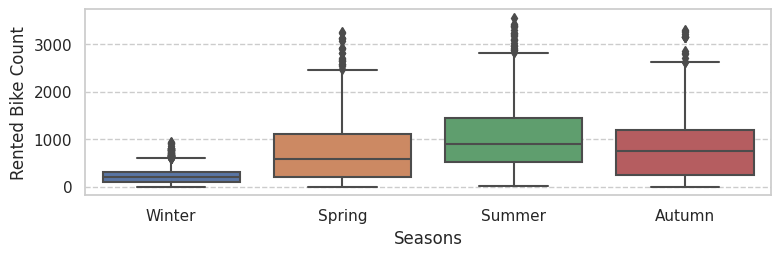



====================================================================== Holiday ======================================================================




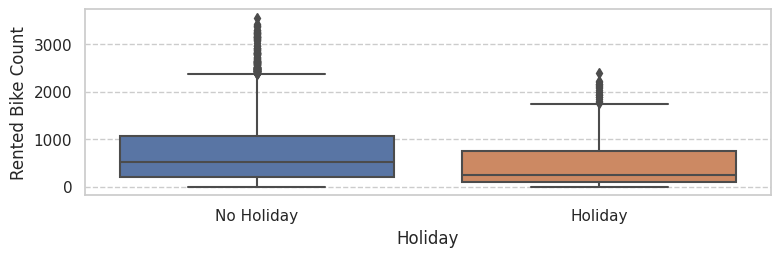



====================================================================== Functioning Day ======================================================================




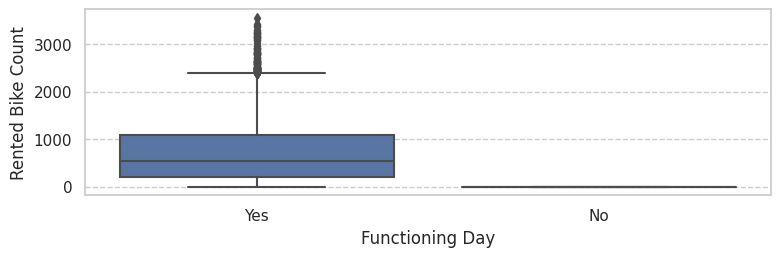



====================================================================== day_of_week ======================================================================




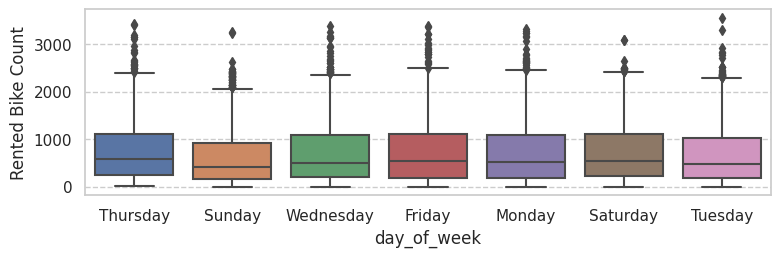



====================================================================== month ======================================================================




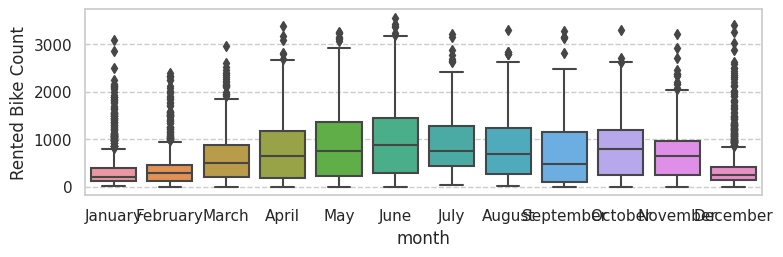



====================================================================== year ======================================================================




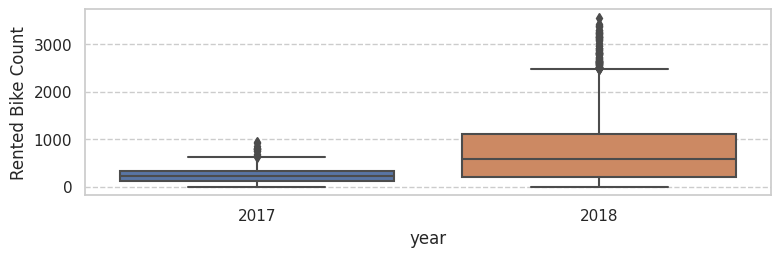

In [ ]:
# Analizar los dos picos sabado y domingo
# Explicación Tecnica
# Diagrama de caja y un diagrama de barras
n = 1
for i in Datos_Categoricos.columns:
    plt.figure(figsize=(15, 15))
    plt.subplot(6, 2, n)
    n += 1
    print('\n')
    print('='*70, i, '='*70)
    print('\n')
    sns.boxplot(x=df[i], y=df["Rented Bike Count"])
    plt.tight_layout()
    plt.show()

In [146]:
df[df['month'] == 'January']['Rented Bike Count'].max()

3088

In [45]:
# Convertimos de días de la semana en dos variables de lunes a viernes en día semanal y sábado/domingo en fin de semana para sumar luego QBike
df['week'] = df['day_of_week'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekdays')

bike_counts = df.groupby('week')['Rented Bike Count'].sum()
print(bike_counts)

week
Weekdays    4462544
Weekend     1709770
Name: Rented Bike Count, dtype: int64


Text(0.5, 1.0, 'Respecto la hora se analizan las Q de bicicletas alquiladas en los días semanales vs fines de semana')

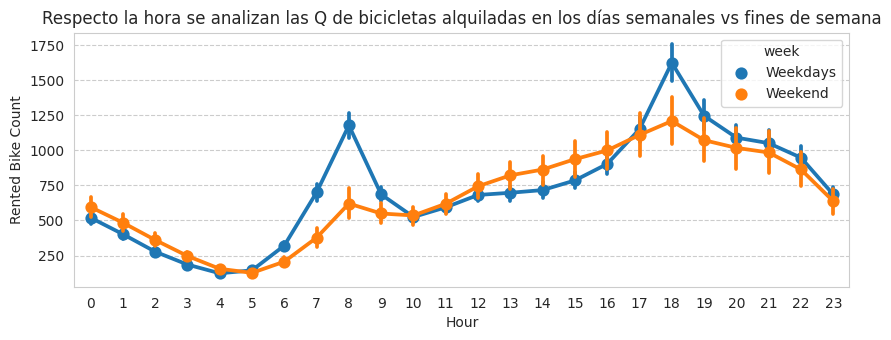

In [13]:
# Analizaremos el grafico de punto con esta segmentacion de la semana.
plt.figure(figsize=(10,3.3))
sns.pointplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df['week'])
plt.title('Respecto la hora se analizan las Q de bicicletas alquiladas en los días semanales vs fines de semana')

In [ ]:
# eliminamos la columna de los días de la semana de df y de la característica categórica
#df.drop(columns=['day_of_week'], inplace=True)
#Datos_Categoricos.drop(columns=['day_of_week'], inplace=True)

In [46]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,PK_Natural,day_of_week,month,year,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 0,Thursday,January,2017,Weekdays
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 1,Thursday,January,2017,Weekdays
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 2,Thursday,January,2017,Weekdays
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 3,Thursday,January,2017,Weekdays
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 4,Thursday,January,2017,Weekdays


In [48]:
# Data Standardization - Dummy
dummy_variable_1 = pd.get_dummies(df['Hour'])
dummy_variable_1.head()

dummy_variable_1.rename(columns={'0':'Hora_0', '1':'Hora_1', '2':'Hora_2', '3':'Hora_3', '4':'Hora_4', '5':'Hora_5', '6':'Hora_6', '7':'Hora_7', '8':'Hora_8', '9':'Hora_9', '10':'Hora_10', '11':'Hora_11', '12':'Hora_12', '13':'Hora_13', '14':'Hora_14', '15':'Hora_15', '16':'Hora_16', '17':'Hora_17', '18':'Hora_18', '19':'Hora_19', '20':'Hora_20', '21':'Hora_21', '22':'Hora_22', '23':'Hora_23'}, inplace=True)
dummy_variable_1.head()

# Agregar a DataFrame
df = pd.concat([df, dummy_variable_1], axis=1)

# Eliminar principal
df.drop('Hour', axis = 1, inplace=True)

df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,14,15,16,17,18,19,20,21,22,23
0,254,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,...,0,0,0,0,0,0,0,0,0,0
1,204,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,...,0,0,0,0,0,0,0,0,0,0
2,173,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,Winter,...,0,0,0,0,0,0,0,0,0,0
3,107,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,...,0,0,0,0,0,0,0,0,0,0
4,78,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,Winter,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dummy_variable_2 = pd.get_dummies(df['Seasons'])
dummy_variable_2.head()

dummy_variable_2.rename(columns={'Spring': 'Seasons_Spring', 'Summer': 'Seasons_Summer', 'Autumn': 'Seasons_Autumn', 'Winter': 'Seasons_Winter'}, inplace=True)
dummy_variable_2.head()

# Agregar a DataFrame
df = pd.concat([df, dummy_variable_2], axis=1)

# Eliminar principal
df.drop('Seasons', axis = 1, inplace=True)

df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,18,19,20,21,22,23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,No Holiday,...,0,0,0,0,0,0,0,0,0,1
1,204,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,No Holiday,...,0,0,0,0,0,0,0,0,0,1
2,173,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,No Holiday,...,0,0,0,0,0,0,0,0,0,1
3,107,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,No Holiday,...,0,0,0,0,0,0,0,0,0,1
4,78,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,No Holiday,...,0,0,0,0,0,0,0,0,0,1


In [50]:
# Cambiar nombre de columna
df = df.rename(columns={'Holiday': 'Holiday_C'})

dummy_variable_3 = pd.get_dummies(df['Holiday_C'])
dummy_variable_3.head()

dummy_variable_3.rename(columns={'No Holiday': 'Not_Holiday', 'Holiday': 'Is_Holiday'}, inplace=True)
dummy_variable_3.head()

# Agregar a DataFrame
df = pd.concat([df, dummy_variable_3], axis=1)

# Eliminar principal
df.drop('Holiday_C', axis = 1, inplace=True)

df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,...,20,21,22,23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Is_Holiday,Not_Holiday
0,254,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Yes,...,0,0,0,0,0,0,0,1,0,1
1,204,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Yes,...,0,0,0,0,0,0,0,1,0,1
2,173,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,Yes,...,0,0,0,0,0,0,0,1,0,1
3,107,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Yes,...,0,0,0,0,0,0,0,1,0,1
4,78,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,Yes,...,0,0,0,0,0,0,0,1,0,1


In [51]:
dummy_variable_4 = pd.get_dummies(df['Functioning Day'])
dummy_variable_4.head()

dummy_variable_4.rename(columns={'No': 'Not_Functioning', 'Yes': 'Is_Functioning'}, inplace=True)
dummy_variable_4.head()

# Agregar a DataFrame 
df = pd.concat([df, dummy_variable_4], axis=1)

# Eliminar principal
df.drop('Functioning Day', axis = 1, inplace=True)

df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),PK_Natural,...,22,23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Is_Holiday,Not_Holiday,Not_Functioning,Is_Functioning
0,254,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-01-12 0,...,0,0,0,0,0,1,0,1,0,1
1,204,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-01-12 1,...,0,0,0,0,0,1,0,1,0,1
2,173,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,2017-01-12 2,...,0,0,0,0,0,1,0,1,0,1
3,107,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-01-12 3,...,0,0,0,0,0,1,0,1,0,1
4,78,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,2017-01-12 4,...,0,0,0,0,0,1,0,1,0,1


In [52]:
dummy_variable_5 = pd.get_dummies(df['week'])
dummy_variable_5.head()

dummy_variable_5.rename(columns={'Weekend': 'Is_Weekend', 'Yes': 'Is_Weekdays'}, inplace=True)
dummy_variable_5.head()

# Agregar a DataFrame 
df = pd.concat([df, dummy_variable_5], axis=1)

# Eliminar principal
df.drop('week', axis = 1, inplace=True)

df.head()


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),PK_Natural,...,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Is_Holiday,Not_Holiday,Not_Functioning,Is_Functioning,Weekdays,Is_Weekend
0,254,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-01-12 0,...,0,0,0,1,0,1,0,1,1,0
1,204,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-01-12 1,...,0,0,0,1,0,1,0,1,1,0
2,173,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,2017-01-12 2,...,0,0,0,1,0,1,0,1,1,0
3,107,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,2017-01-12 3,...,0,0,0,1,0,1,0,1,1,0
4,78,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,2017-01-12 4,...,0,0,0,1,0,1,0,1,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   float64
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   float64
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   PK_Natural                 8760 non-null   object 
 10  day_of_week                8760 non-null   object 
 11  month                      8760 non-null   object 
 12  year                       8760 non-null   object 
 13  0                          8760 non-null   uint8

In [54]:
# Aumenta Colums) 
df.shape

(8760, 47)

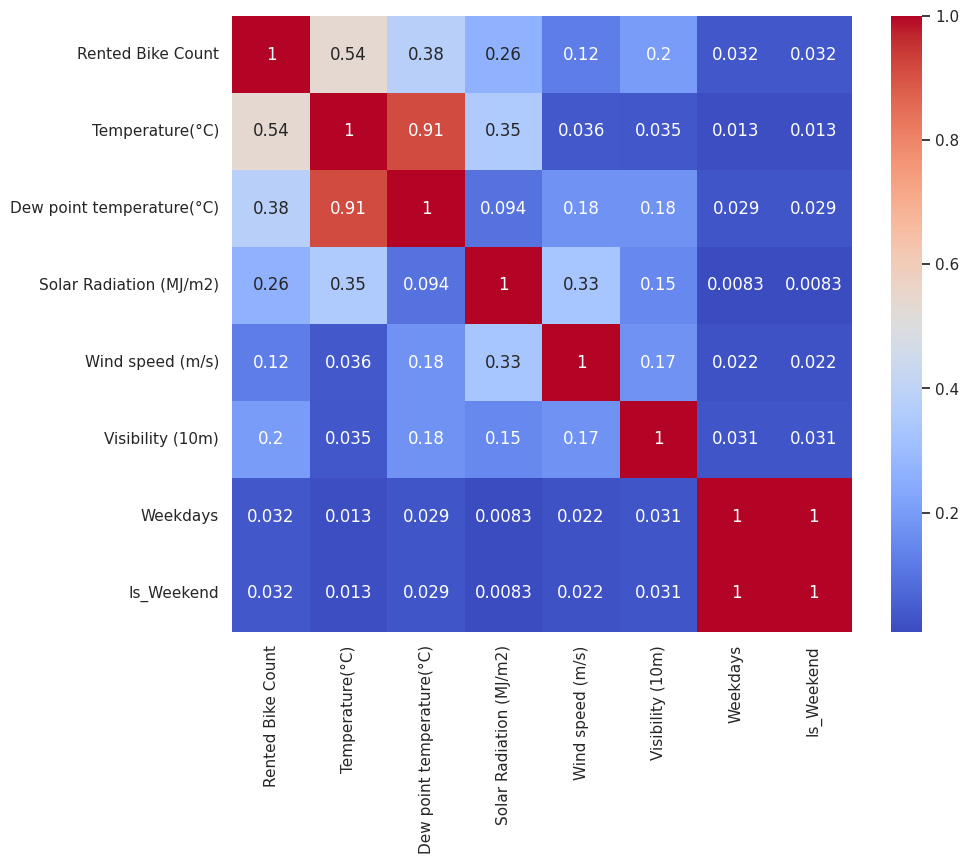

In [55]:
# Seleccionar las columnas a incluir en el mapa de calor
columns = ['Rented Bike Count', 'Temperature(°C)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Wind speed (m/s)', 'Visibility (10m)', 'Weekdays', 'Is_Weekend']

# Crear un nuevo dataframe solo con esas columnas
df_corr = df[columns]

# Calcular la matriz de correlación
corr = df_corr.corr()

# Graficar el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(abs(corr), cmap='coolwarm', annot=True)
plt.show()

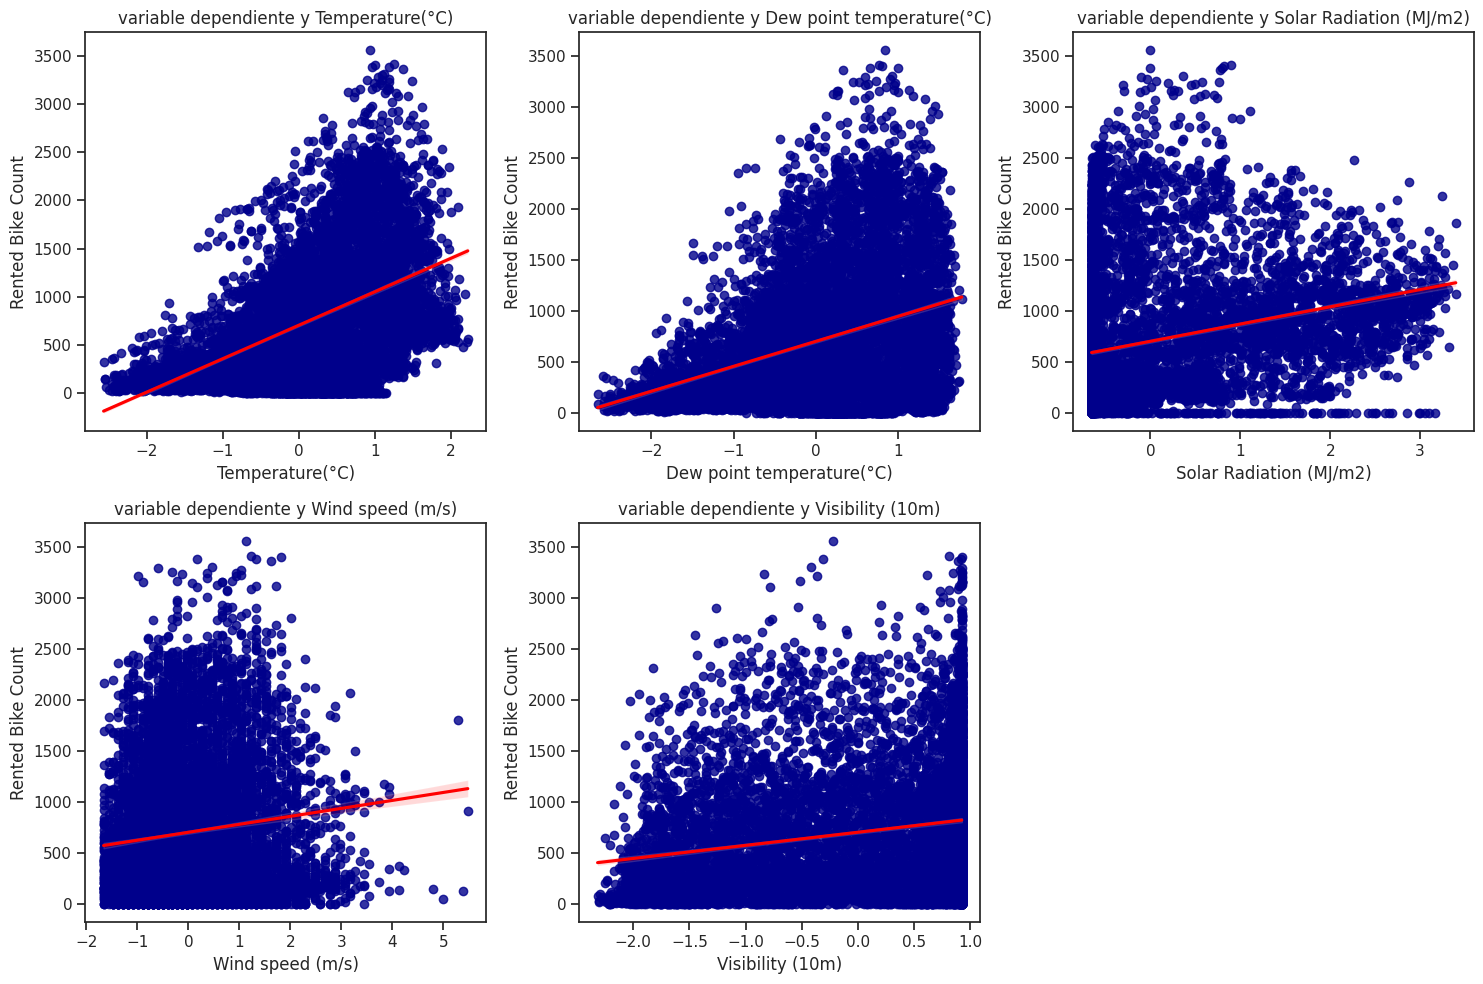

In [56]:
# Matriz de gráficos de regresión
plt.figure(figsize=(15, 10))
sns.set(style='ticks')
GraficoColums = ['Temperature(°C)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Wind speed (m/s)', 'Visibility (10m)']

# Iteramos sobre las variables numéricas
for i, col in enumerate(GraficoColums):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=col, y="Rented Bike Count", data=df, scatter_kws={"color": "darkblue"}, line_kws={"color": "red"})
    plt.title(f"variable dependiente y {col}")
    plt.tight_layout()
plt.show()


In [57]:
# Organizar e
df.corr()

<ipython-input-57-5d1d93b54961>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),0,...,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Is_Holiday,Not_Holiday,Not_Functioning,Is_Functioning,Weekdays,Is_Weekend
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-5.274339e-02,...,1.027530e-01,2.288822e-02,2.965494e-01,-4.249251e-01,-7.233757e-02,7.233757e-02,-0.203943,0.203943,3.225936e-02,-3.225936e-02
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-2.787295e-02,...,5.972825e-02,7.959684e-03,6.658462e-01,-7.387196e-01,-5.593084e-02,5.593084e-02,0.050170,-0.050170,1.297241e-02,-1.297241e-02
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,6.934014e-02,...,2.836650e-02,1.569416e-02,1.925949e-01,-2.382952e-01,-5.027765e-02,5.027765e-02,0.020800,-0.020800,3.674982e-02,-3.674982e-02
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-5.457342e-02,...,-1.280093e-01,8.385451e-02,-6.469790e-02,1.091865e-01,2.301677e-02,-2.301677e-02,-0.005037,0.005037,2.239107e-02,-2.239107e-02
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.180947e-03,...,1.174133e-01,-1.874983e-01,6.195792e-02,8.616224e-03,3.177281e-02,-3.177281e-02,0.026000,-0.026000,-3.064954e-02,3.064954e-02
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,7.491422e-03,...,6.287829e-02,2.055888e-03,6.523778e-01,-7.223664e-01,-6.675910e-02,6.675910e-02,0.052837,-0.052837,2.896569e-02,-2.896569e-02
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-1.366044e-01,...,-3.137428e-02,7.997416e-02,1.284017e-01,-1.784202e-01,-5.077255e-03,5.077255e-03,0.007665,-0.007665,-8.271095e-03,8.271095e-03
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-6.435365e-04,...,-1.324655e-02,1.759519e-02,5.392817e-02,-5.875456e-02,-1.426911e-02,1.426911e-02,-0.002055,0.002055,1.427960e-02,-1.427960e-02
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-6.409660e-03,...,-2.474218e-02,-9.978516e-02,-9.978516e-02,2.258745e-01,-1.259072e-02,1.259072e-02,-0.032089,0.032089,2.255705e-02,-2.255705e-02
0,-0.052743,-0.027873,0.069340,-0.054573,-0.001181,0.007491,-0.136604,-0.000644,-0.006410,1.000000e+00,...,5.609494e-17,-1.001904e-16,4.538546e-17,-8.024245e-19,-2.313591e-18,8.158210e-19,0.002243,-0.002243,-7.300117e-18,5.036294e-18


In [ ]:
# Conclusiones:
# Podemos determinar que la temperatura es la variable con la que mas corrrelacion tenemos frente a nuestra variable principal "Rented Bike Vount".
# Lo anterior dado a que la temperatura esta asociada a la Estacion y Mes lo cual estaba correlacionado segun los datos categoricos. 

In [58]:
# Distancia entre Temperatura vs Q renta de Bike
# Calculemos el coeficiente de correlación de Pearson y el valor P de la Temperatura vs Q renta de Bike
pearson_coef, p_value = stats.pearsonr(df['Temperature(°C)'], df['Rented Bike Count'])
print('El coeficiente de correlación de Pearson es', pearson_coef, 'con un P-value de P =', p_value)  


El coeficiente de correlación de Pearson es 0.5385581530139791 con un P-value de P = 0.0


In [71]:
# Model Development
# Creacion de x
Z = df[['Temperature(°C)', 'Dew point temperature(°C)']]

In [72]:
Z1 = pd.DataFrame()
Z1['Temperature(°C)'] = df['Temperature(°C)']
Z1['Dew point temperature(°C)'] = df['Dew point temperature(°C)']
y = df['Rented Bike Count']

In [73]:
# Repatrtir bbdd
X_train, X_test, y_train, y_test = train_test_split(Z1, y, test_size=0.3, random_state=0)

In [135]:
# Creamos una instancia del scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Seleccionamos las columnas a escalar
#columns_to_scale = ["Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)",
#                    "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]

# Escalamos las columnas seleccionadas
#scaled_columns = scaler.fit_transform(df[columns_to_scale])

# Reemplazamos las columnas originales con las escaladas
#df[columns_to_scale] = scaled_columns

#df.head()

# Escalar las variables antes de aplicar un modelo de regresión es una buena práctica, ya que permite que las variables tengan la misma escala y magnitud. Esto ayuda a evitar que una variable domine sobre las demás y pueda sesgar los resultados del modelo.

In [ ]:
#Rsqu_test=[]
#order =[1, 2, 3, 4, 5, 8]
#for i in order:
#  pr=PolynomialFeatures(degree=n)
 # x_train_pr

In [200]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
poly_regressor = PolynomialFeatures(degree = 7)
X_poly = poly_regressor.fit_transform(X_train)
poly_regressor.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


Z_pr = lin_reg_2.predict(poly_regressor.fit_transform(X_test))

In [201]:
# The coefficients
print("coeficientes: \n",lin_reg_2.coef_)
# The mean squared error
print("Mean cuadrado error: %.2f" % mean_squared_error(y_test, Z_pr))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, Z_pr))

coeficientes: 
 [ 1.82472794e-09  1.02208897e+03 -6.38860361e+02  1.23721482e+02
  2.67985730e+02 -1.18747226e+02 -4.34528582e+02  1.18631784e+03
 -1.04580825e+03  4.80319178e+02 -2.74514585e+02  1.32060319e+03
 -3.54133000e+03  3.57917193e+03 -1.34577058e+03  7.20263172e+02
 -3.96037996e+03  8.48094924e+03 -9.84516196e+03  6.08163113e+03
 -1.62741551e+03 -2.95917571e+02  1.76427263e+03 -3.95678780e+03
  4.34735015e+03 -2.18378314e+03  2.78144305e+02  9.79874142e+01
 -3.39787116e+01  8.66456676e+01 -4.55588189e+01  4.23543223e+02
 -1.49299788e+03  2.08015174e+03 -1.32479827e+03  3.32798606e+02]
Mean cuadrado error: 225352.37
Coefficient of determination: 0.45


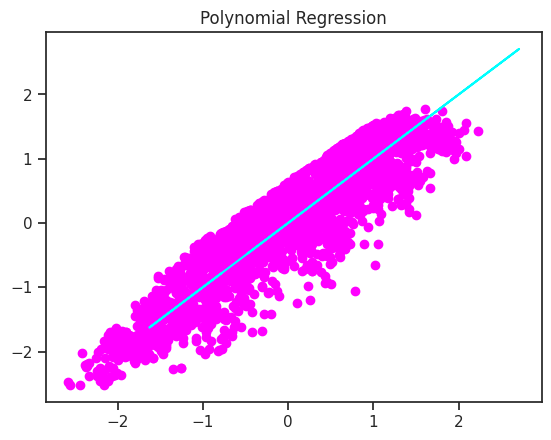

In [142]:
"""## Visualising the Polynomial Regression results"""
#X_test = scaler.inverse_transform(X_test)
Z_pr = scaler.fit_transform(Z_pr.reshape(-1,1))
plt.scatter(pd.DataFrame(X_test).iloc[:,0], pd.DataFrame(X_test).iloc[:,1], color = 'magenta')
plt.plot(Z_pr, Z_pr, color = 'cyan')
plt.title('Polynomial Regression')
plt.show()

In [112]:
X_train.shape

(6132, 2)

In [114]:
y_train.tolist()

[1035,
 533,
 787,
 108,
 1057,
 422,
 1806,
 16,
 1165,
 733,
 334,
 321,
 231,
 716,
 906,
 2372,
 315,
 1737,
 381,
 932,
 902,
 1006,
 505,
 482,
 183,
 1146,
 1644,
 1215,
 588,
 284,
 1039,
 193,
 839,
 341,
 1629,
 1017,
 159,
 431,
 277,
 1099,
 1168,
 1600,
 1122,
 1030,
 116,
 887,
 1315,
 0,
 534,
 1153,
 258,
 90,
 166,
 1726,
 223,
 254,
 1579,
 1213,
 650,
 23,
 1152,
 956,
 91,
 2339,
 0,
 2368,
 470,
 1005,
 1035,
 1234,
 428,
 1083,
 132,
 2346,
 1416,
 1653,
 613,
 298,
 522,
 93,
 381,
 1069,
 196,
 988,
 402,
 127,
 225,
 1393,
 624,
 563,
 816,
 425,
 487,
 318,
 1260,
 260,
 581,
 956,
 1023,
 2278,
 104,
 119,
 1346,
 2153,
 3154,
 375,
 1723,
 99,
 1206,
 20,
 757,
 2656,
 1426,
 22,
 0,
 148,
 401,
 288,
 14,
 877,
 349,
 1091,
 963,
 398,
 328,
 1393,
 2090,
 512,
 621,
 869,
 95,
 1997,
 1995,
 32,
 785,
 118,
 380,
 1761,
 0,
 22,
 135,
 661,
 18,
 683,
 0,
 2664,
 1446,
 492,
 663,
 476,
 837,
 274,
 180,
 697,
 157,
 59,
 1517,
 532,
 2035,
 935,
 161,
 24